In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor

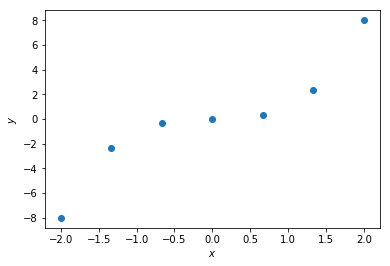

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');


In [3]:
# Вопрос 01. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку.
# Как будут выглядеть предсказания данного дерева для x∈[−2,2]x∈[−2,2]? Постройте соответствующий график.

In [4]:
ym1 = [np.median(y) for i in range(len(X))]

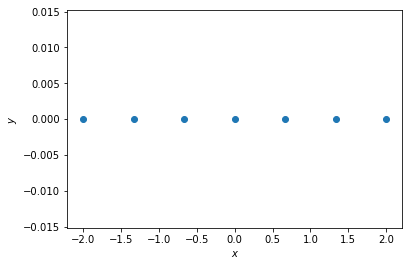

In [5]:
plt.scatter(X, ym1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [6]:
# Вопрос 02. Произведем первое разбиение выборки по предикату [x<0]. Получим дерево глубины 1 с двумя листьями.

In [7]:
X1 = []
X2 = []
y1 = []
y2 = []

for i in range(len(X)):
    if X[i] < 0:
        X1.append(X[i])
        y1.append(y[i])
    else:
        X2.append(X[i])
        y2.append(y[i])

In [34]:
ym1 = [np.median(y1) for i in range(len(X1))]
ym2 = [np.median(y2) for i in range(len(X2))]

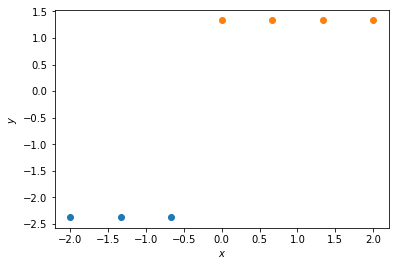

In [35]:
plt.scatter(X1, ym1)
plt.scatter(X2, ym2)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');


In [31]:
#Вопрос 03. Постройте график функции Q(X,t)Q(X,t) в корне в зависимости от значения порога tt на отрезке [−1.9,1.9][−1.9,1.9].

In [10]:
def disper(X, y):
    d = (1./ len(X)) * sum (np.power(y - (1./ len(X)) * sum(y), 2))
    return d

In [22]:
def regression_var_criterion(X, y, t):

    X1 = []
    X2 = []
    y1 = []
    y2 = []

    for i in range(len(X)):
        if X[i] < t:
            X1.append(X[i])
            y1.append(y[i])
        else:
            X2.append(X[i])
            y2.append(y[i])
    Q = disper(X, y) - (len(X1) / X.shape[0]) * disper(X1, y1) -(len(X2) / X.shape[0]) * disper(X2, y2)
    return Q

In [30]:
t = [i / 10 for i in range(-19, 19)]
Q = []
for i in t:
    Q.append(regression_var_criterion(X, y, i))
print(Q)
print(max(Q))

[10.666666666666664, 10.666666666666664, 10.666666666666664, 10.666666666666664, 10.666666666666664, 10.666666666666664, 10.754458161865568, 10.754458161865568, 10.754458161865568, 10.754458161865568, 10.754458161865568, 10.754458161865568, 10.754458161865568, 9.481481481481481, 9.481481481481481, 9.481481481481481, 9.481481481481481, 9.481481481481481, 9.481481481481481, 9.481481481481481, 9.4814814814814774, 9.4814814814814774, 9.4814814814814774, 9.4814814814814774, 9.4814814814814774, 9.4814814814814774, 10.754458161865566, 10.754458161865566, 10.754458161865566, 10.754458161865566, 10.754458161865566, 10.754458161865566, 10.754458161865566, 10.666666666666666, 10.666666666666666, 10.666666666666666, 10.666666666666666, 10.666666666666666]
10.7544581619


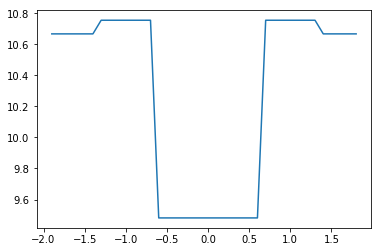

In [29]:
plt.plot(t, Q)

In [32]:
# Теперь произведем разбиение в каждой из листовых вершин. 
# В левой (соответствующей ветви x<0) – по предикату [x<−1.5], 
# а в правой (соответствующей ветви x⩾0) – по предикату [x<1.5]. 

In [33]:
X11 = [] #[x<−1.5]
X12 = [] #[−1.5<x<0]
X21 = [] #[0<x<1.5]
X22 = [] #[x>1.5]
y11 = []
y12 = []
y21 = []
y22 = []


for i in range(len(X1)):
    if X1[i] < -1.5:
        X11.append(X1[i])
        y11.append(y1[i])
    else:
        X12.append(X1[i])
        y12.append(y1[i])
for i in range(len(X2)):
    if X2[i] < 1.5:
        X21.append(X2[i])
        y21.append(y2[i])
    else:
        X22.append(X2[i])
        y22.append(y2[i])

In [36]:
ym11 = [np.median(y11) for i in range(len(X11))]
ym12 = [np.median(y12) for i in range(len(X12))]
ym21 = [np.median(y21) for i in range(len(X21))]
ym22 = [np.median(y22) for i in range(len(X22))]

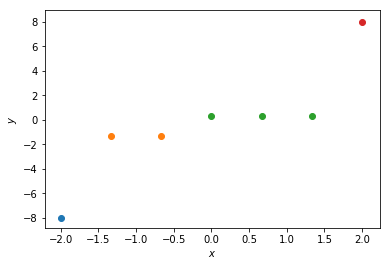

In [42]:
plt.scatter(X11, ym11)
plt.scatter(X12, ym12)
plt.scatter(X21, ym21)
plt.scatter(X22, ym22)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');


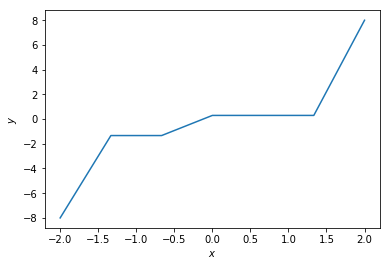

In [49]:
yv2 = ym11 + ym12 + ym21 + ym22
plt.plot(X, yv2 )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');


In [43]:
# ну может на 5 но кто его знает. я не знаю как это всё строить =( .

In [50]:
# НАКОНЕЦ СО ВСТРОЕННЫМИ ШТУКАМИ!!!!!!!

In [142]:
url ='https://raw.githubusercontent.com/Yorko/mlcourse_open/master/data/mlbootcamp5_train.csv'
df = pd.read_csv(url, sep=';', index_col='id')

In [143]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [144]:
df['age_years'] = (df['age'] // 365.25).astype(int)

In [145]:
df[['chol1'] + ['chol2'] + ['chol3']]=pd.get_dummies(df[('cholesterol')],  prefix='cholesterol')

In [146]:
df[['gluc1'] + ['gluc2'] + ['gluc3']]=pd.get_dummies(df[('gluc')],  prefix='gluc')

In [147]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,chol1,chol2,chol3,gluc1,gluc2,gluc3
id,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,1,0,0,1,0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 19 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
age_years      70000 non-null int32
chol1          70000 non-null uint8
chol2          70000 non-null uint8
chol3          70000 non-null uint8
gluc1          70000 non-null uint8
gluc2          70000 non-null uint8
gluc3          70000 non-null uint8
dtypes: float64(1), int32(1), int64(11), uint8(6)
memory usage: 7.6 MB


In [149]:
y_var = df['cardio']
df.drop(['cardio' , 'cholesterol' , 'gluc'], axis=1, inplace=True)

In [150]:
X_train, X_valid, y_train, y_valid = train_test_split(df.values, y_var, test_size=0.3, random_state=17)

In [151]:
mytree = DecisionTreeClassifier(max_depth=3, random_state=17)
mytree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [152]:
export_graphviz(mytree, out_file='tree.dot', feature_names=df.columns) 

In [153]:
!dot -Tpng tree.dot -o tree.png

In [154]:
import os
os.startfile(r'tree.png')

In [155]:
# там есть ap_hi, age, chol3

In [156]:
# Сделайте с помощью обученного дерева прогноз для отложенной выборки (X_valid, y_valid).
# Посчитайте долю верных ответов (accuracy).

In [157]:
# доля без кросс валидации

In [158]:
from sklearn.metrics import accuracy_score

tree_pred = mytree.predict(X_valid)
pred1 = accuracy_score(y_valid, tree_pred) 
print(pred1)

0.721285714286


In [159]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(mytree, tree_params, cv=5)

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [160]:
# доля с кросс валидацией

In [161]:
pred2 = accuracy_score(y_valid, tree_grid.predict(X_valid))
print(pred2)

0.72580952381


In [162]:
tree_grid.best_params_

{'max_depth': 6}

In [163]:
results = tree_grid.cv_results_

In [164]:
results

{'mean_fit_time': array([ 0.04201255,  0.05084791,  0.0630003 ,  0.07782497,  0.08856382,
         0.10170565,  0.11372671,  0.1244565 ,  0.13572989]),
 'mean_score_time': array([ 0.00140481,  0.00160408,  0.00170531,  0.00141134,  0.00161209,
         0.00200043,  0.00220666,  0.00219846,  0.00301762]),
 'mean_test_score': array([ 0.7155102 ,  0.72771429,  0.7304898 ,  0.73095918,  0.73195918,
         0.73040816,  0.72971429,  0.72791837,  0.72634694]),
 'mean_train_score': array([ 0.71551022,  0.7277143 ,  0.7307194 ,  0.73351022,  0.73529084,
         0.73989288,  0.7449388 ,  0.75079594,  0.75808675]),
 'param_max_depth': masked_array(data = [2 3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': ({'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}),
 'rank_test_score': array([9

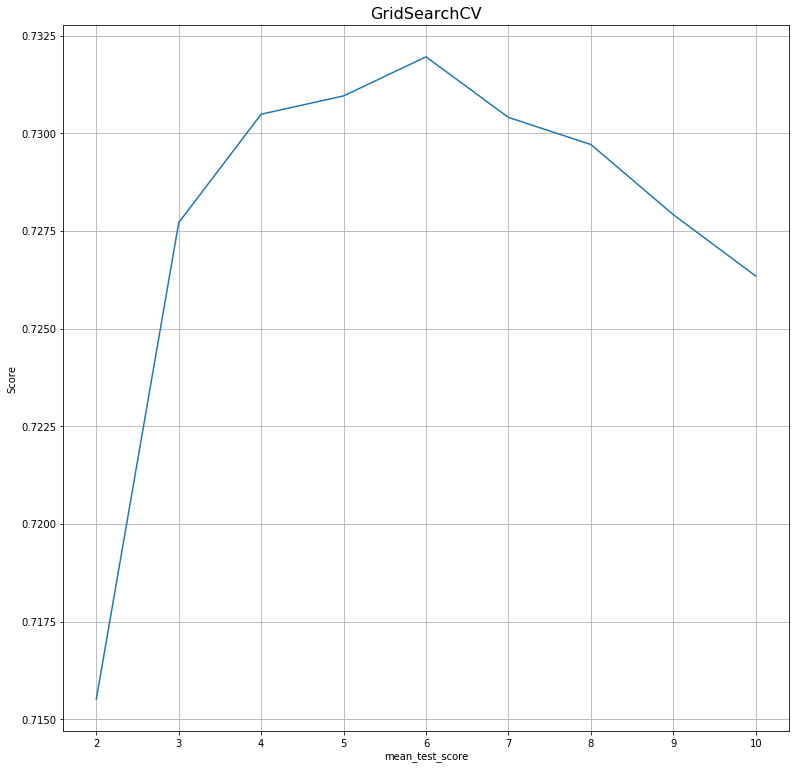

In [165]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV", fontsize=16)

plt.xlabel("mean_test_score")
plt.ylabel("Score")
plt.grid()

# Get the regular numpy array from the MaskedArray
Y_axis = np.array(results['mean_test_score'].data, dtype=float)
X_axis = np.array(results['param_max_depth'].data, dtype=float)
plt.plot(X_axis, Y_axis)
plt.show()

In [166]:
# Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке?

In [197]:
((pred2 - pred1) / pred1) * 100

0.62718690169670022

In [168]:
# (да, нет) четкий пик вроде есть на max_depth = 6. 0.45% вроде меньше 1%. хз кароч

In [169]:
# Вопрос 5

In [170]:
# 1й признак - возраст в 4х категориях

In [171]:
df['age45-50'] = df['age_years'].apply(lambda x: 1 if x >= 45 and x < 50 else 0)
df['age50-55'] = df['age_years'].apply(lambda x: 1 if x >= 50 and x < 55 else 0)
df['age55-60'] = df['age_years'].apply(lambda x: 1 if x >= 55 and x < 60 else 0)
df['age60-65'] = df['age_years'].apply(lambda x: 1 if x >= 60 and x < 65 else 0)

In [172]:
# 2й признак - верхнее артериальное давление

In [173]:
df['ap_hi120-140'] = df['ap_hi'].apply(lambda x: 1 if x >= 120 and x < 140 else 0)
df['ap_hi140-160'] = df['ap_hi'].apply(lambda x: 1 if x >= 140 and x < 160 else 0)
df['ap_hi160-180'] = df['ap_hi'].apply(lambda x: 1 if x >= 160 and x < 180 else 0)


In [174]:
# 3й признак - пол м/ж

In [175]:
df.gender.replace(to_replace=[1, 2], value=[0, 1], inplace=True)
df['male'] = df['gender']

In [190]:
new_df = pd.DataFrame(data = df[['age45-50'] + ['age50-55'] + ['age55-60'] + ['age60-65'] + 
                             ['ap_hi120-140'] + ['ap_hi140-160'] + ['ap_hi160-180'] + ['chol1'] + ['chol2'] + ['chol3'] + 
                             ['smoke'] + ['male']])

In [191]:
new_df.head()

,age45-50,age50-55,age55-60,age60-65,ap_hi120-140,ap_hi140-160,ap_hi160-180,chol1,chol2,chol3,smoke,male
id,,,,,,,,,,,,
0,0,1,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,1,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0


In [192]:
mytree_new = DecisionTreeClassifier(max_depth=3, random_state=17)
mytree_new.fit(new_df.values, y_var)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [193]:
export_graphviz(mytree_new, out_file='tree_new.dot', feature_names=new_df.columns) 

!dot -Tpng tree_new.dot -o tree_new.png

import os
os.startfile(r'tree_new.png')

In [194]:

import os
os.startfile(r'tree_new.png')